In [18]:
!pip install missingno

In [1]:
#import libraries: pandas, numpy, matplotlib (set %matplotlib inline), matplotlib’s pyplot, seaborn, missingno, scipy’s stats, sklearn
#This jupyter notebook is prepared by “Gabriela Santiago”.
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
import sklearn
import missingno as msno

In [2]:
#import the data to a dataframe and show how many rows and columns does it have 
df = pd.read_csv('hrdata.csv')

In [3]:
print("Rows: ", len(df))
print("Columns: ", len(df.columns))

Rows:  21287
Columns:  18


In [9]:
#call the describe method of dataframe to see some summary statistics of the numerical columns
df.describe()

,Unnamed: 0,rec_num,enrollee_id,city_development_index,training_hours,target,city_development_matrics
count,21287.000000,21287.000000,21287.000000,21287.000000,21287.000000,19158.000000,21287.000000
mean,10643.000000,10644.000000,16873.983652,0.828462,65.328510,0.249348,8.284615
std,6145.171926,6145.171926,9612.131237,0.123537,60.075201,0.432647,1.235365
min,0.000000,1.000000,1.000000,0.448000,1.000000,0.000000,4.480000
25%,5321.500000,5322.500000,8554.500000,0.739000,23.000000,0.000000,7.390000
50%,10643.000000,10644.000000,16967.000000,0.903000,47.000000,0.000000,9.030000
75%,15964.500000,15965.500000,25161.500000,0.920000,88.000000,0.000000,9.200000
max,21286.000000,21287.000000,33380.000000,0.949000,336.000000,1.000000,9.490000


In [10]:
#Explain in words if you find any column’s statistics interesting and good to know
#I think it's good to know the training hours' statistics to know if an employee has average or above average training time

In [11]:
#Show the top 5 rows and last 5 rows of the data frame
df.head()

,Unnamed: 0,rec_num,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,state,city_development_matrics
0,0,1,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,CA,9.20
1,1,2,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,CA,7.76
2,2,3,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,CA,6.24
3,3,4,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,CA,7.89
4,4,5,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,CA,7.67


In [12]:
df.tail()

,Unnamed: 0,rec_num,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,state,city_development_matrics
21282,21282,21283,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15,NaN,CA,9.20
21283,21283,21284,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30,NaN,CA,8.97
21284,21284,21285,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18,NaN,CA,8.87
21285,21285,21286,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84,NaN,CA,8.04
21286,21286,21287,12215,city_102,0.804,Male,Has relevent experience,no_enrollment,Masters,STEM,15,10000+,Pvt Ltd,2,11,NaN,CA,8.04


In [13]:
#List all the numerical columns
numerical = df.select_dtypes(include=[np.number])
numerical.columns

Index(['Unnamed: 0', 'rec_num', 'enrollee_id', 'city_development_index',
       'training_hours', 'target', 'city_development_matrics'],
      dtype='object')

In [14]:
#List all the categorial columns
categorical = df.select_dtypes(include=[object])
categorical.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'state'],
      dtype='object')

In [15]:
#Show a list with column wise count of missing values and display the list in count wise descending order
nulls = df.isnull().sum().to_frame('nulls')
nulls.sort_values("nulls", inplace = True, ascending = False)
for index, row in nulls.iterrows():
    print(index, row[0])

company_type 6774
company_size 6560
gender 5016
major_discipline 3125
target 2129
education_level 512
last_new_job 463
enrolled_university 417
experience 70
state 0
training_hours 0
Unnamed: 0 0
rec_num 0
relevent_experience 0
city_development_index 0
city 0
enrollee_id 0
city_development_matrics 0


In [16]:
#Show a list with column wise percentage of missing values and display the list in percentage wise descending order
percentage = df.isnull().mean()*100
percentage = percentage.to_frame("nulls")
percentage.sort_values("nulls", inplace = True, ascending = False)
for index, row in percentage.iterrows():
    print(index, row[0])

company_type 31.822238925165593
company_size 30.816930520975244
gender 23.563677361770093
major_discipline 14.680321322873116
target 10.001409310846995
education_level 2.405223845539531
last_new_job 2.1750364071968806
enrolled_university 1.9589420773241883
experience 0.3288391976323578
state 0.0
training_hours 0.0
Unnamed: 0 0.0
rec_num 0.0
relevent_experience 0.0
city_development_index 0.0
city 0.0
enrollee_id 0.0
city_development_matrics 0.0


<AxesSubplot:>

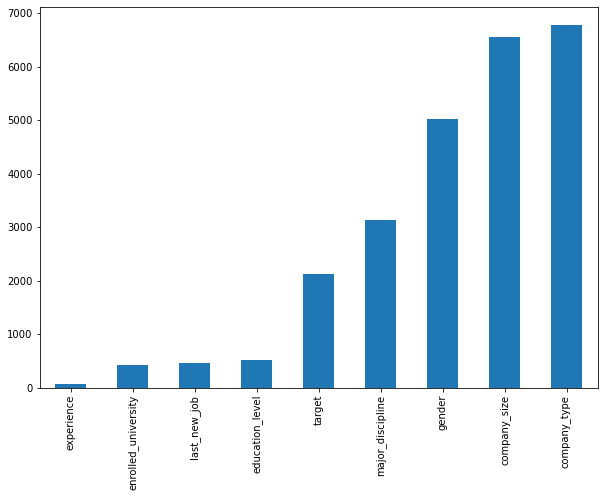

In [17]:
#Display a bar plot to visualize only the columns with missing values and their count. The plot should display from less missing value columns in the left and then more missing value columns to the right side of the plot
missing = df.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace = True)
plt.figure(figsize = (10, 7))
missing.plot.bar()

<AxesSubplot:>

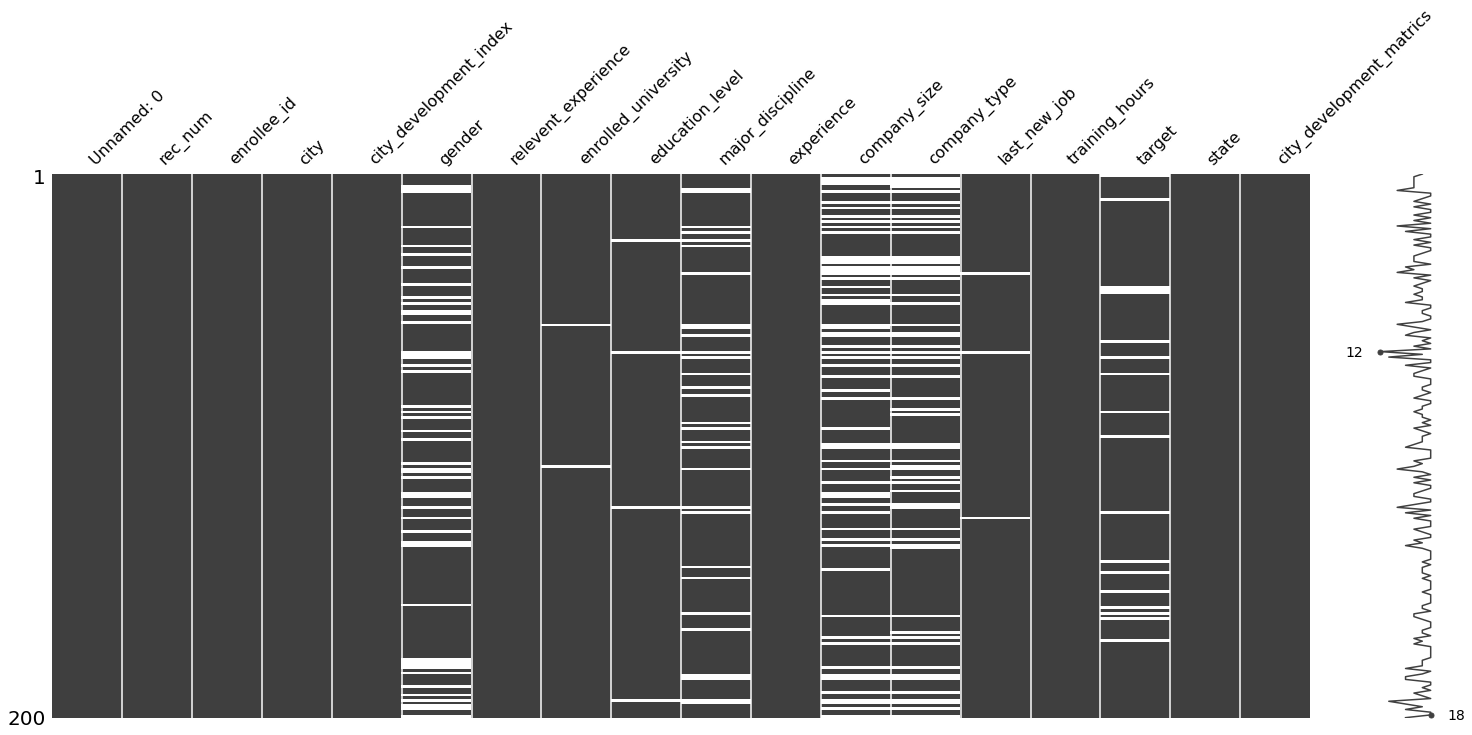

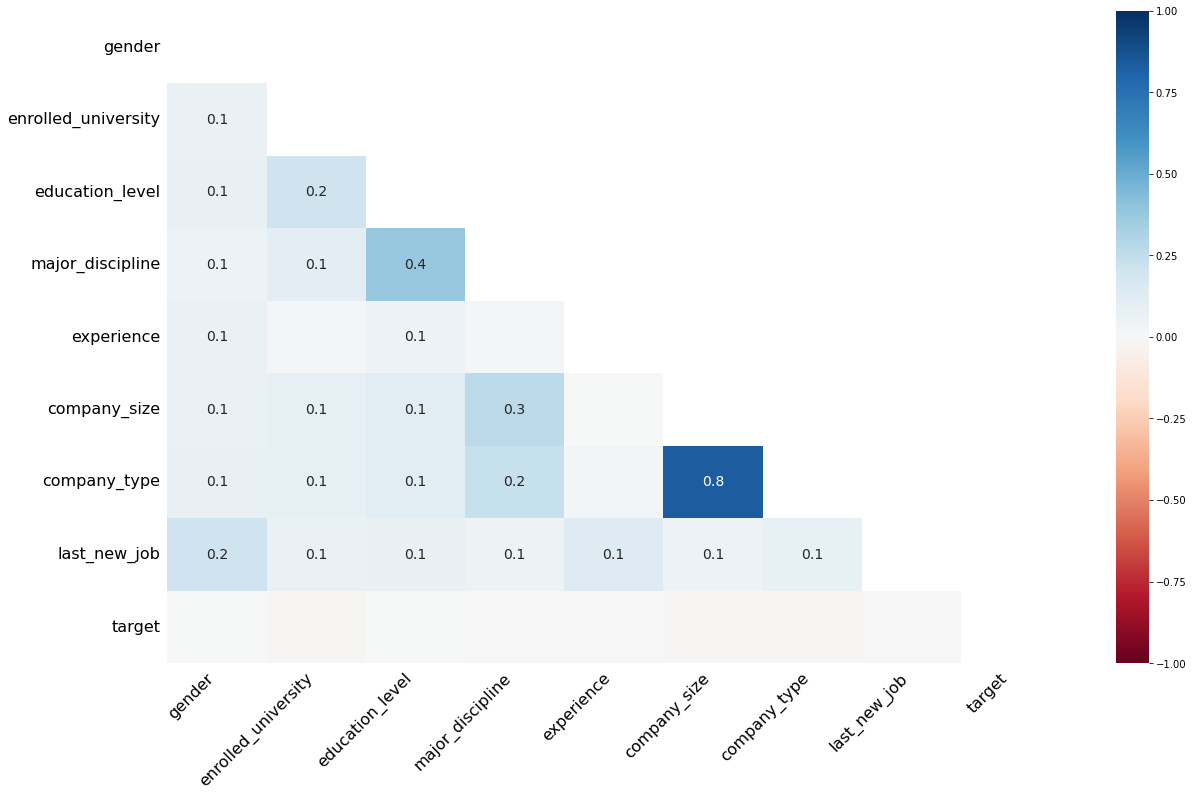

In [31]:
#Use missingno’s bar plot, matrix plot with 200 sample, and heatmap
msno.matrix(df.sample(200))
msno.heatmap(df)

In [32]:
#Interpret any interesting information you found in the heatmap and any one plot
#It's noticeable that there is a relatively strong correlation between the 'company_size' values and the "company_type" category
#It's also noticeable that those two very categories happen to be the columns with the most missingno variables, this may have biased the heatmap

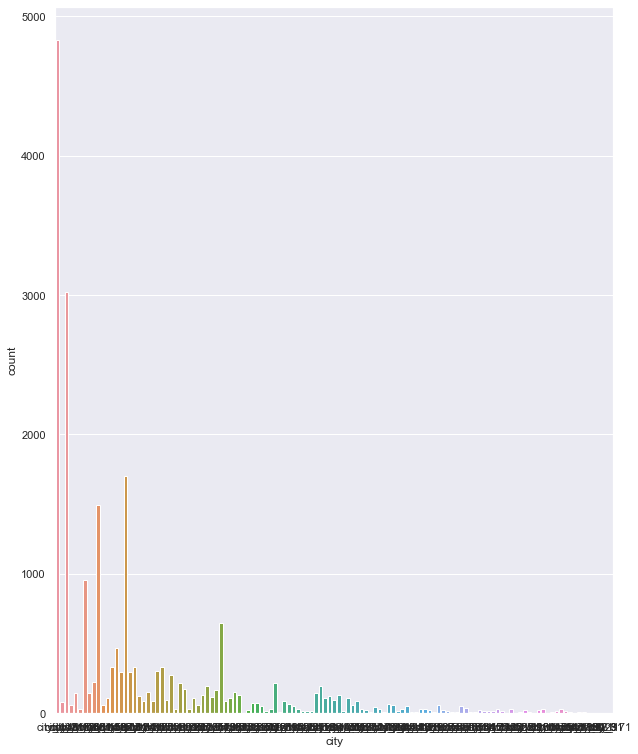

In [20]:
#Use seaborn bar plot for the categorical feature to see different values and count
#I used countplots instead as the bar plots required a y value
sns.countplot(x = 'city', data = categorical)
sns.set(rc={'figure.figsize':(1, 13)})

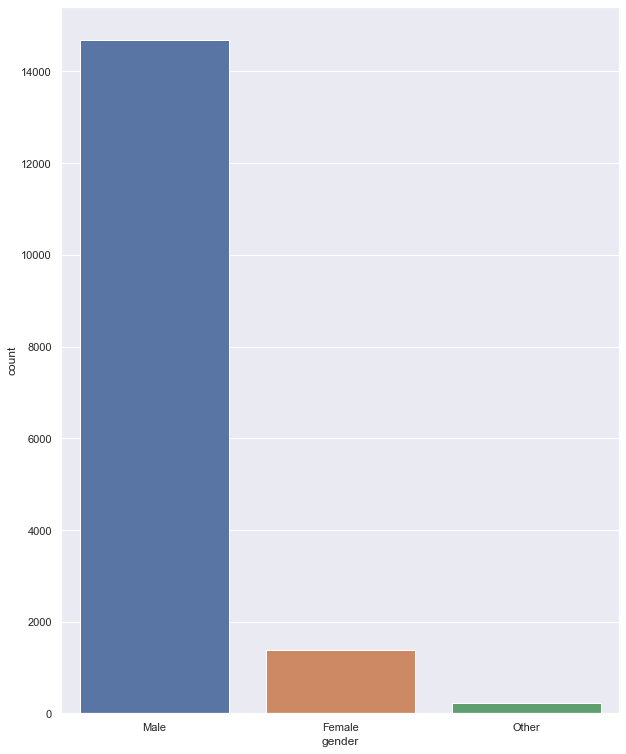

In [83]:
sns.countplot(x = 'gender', data = categorical)
sns.set(rc={'figure.figsize':(10, 13)})

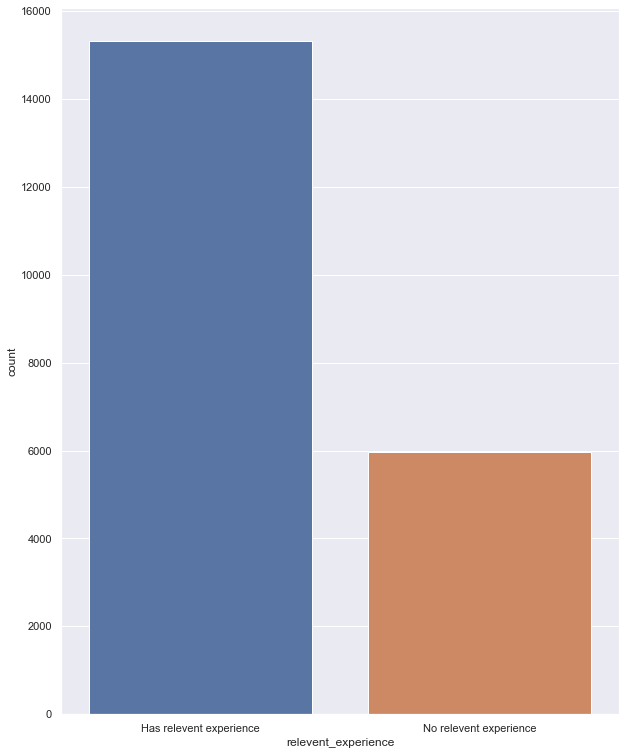

In [35]:
sns.countplot(x = 'relevent_experience', data = categorical)
sns.set(rc={'figure.figsize':(10, 13)})

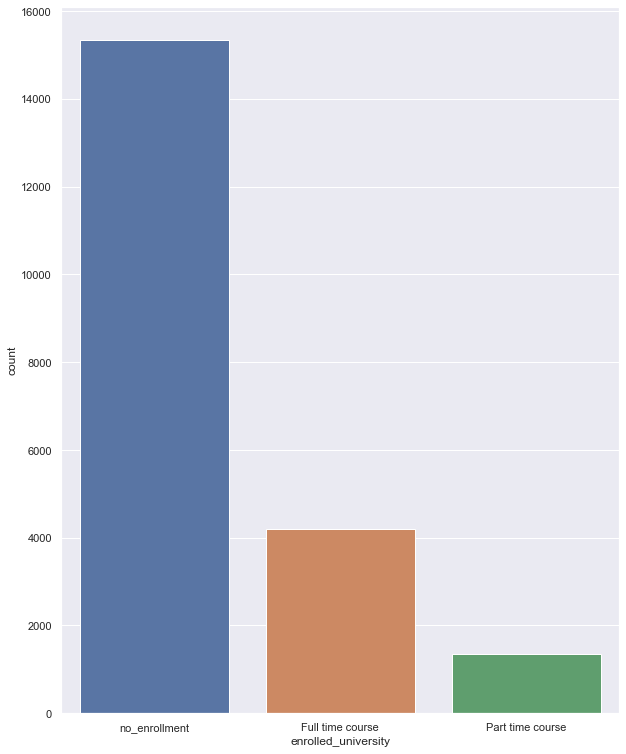

In [36]:
sns.countplot(x = 'enrolled_university', data = categorical)
sns.set(rc={'figure.figsize':(10, 13)})

<AxesSubplot:xlabel='education_level', ylabel='count'>

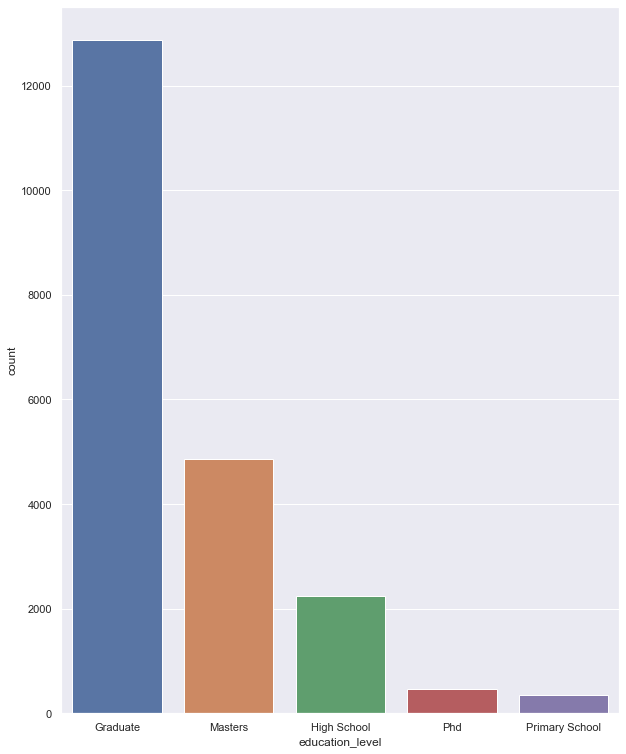

In [37]:
sns.countplot(x = 'education_level', data = categorical)

<AxesSubplot:xlabel='major_discipline', ylabel='count'>

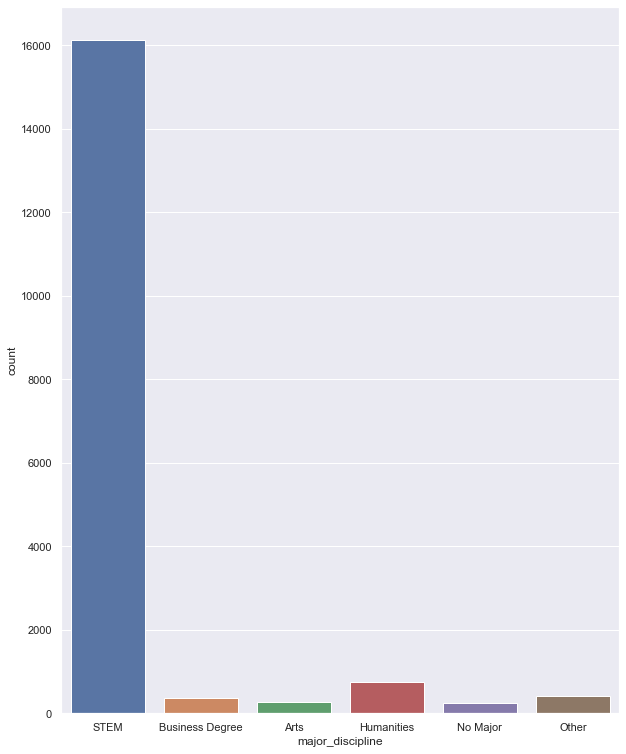

In [38]:
sns.countplot(x = 'major_discipline', data = categorical)

<AxesSubplot:xlabel='experience', ylabel='count'>

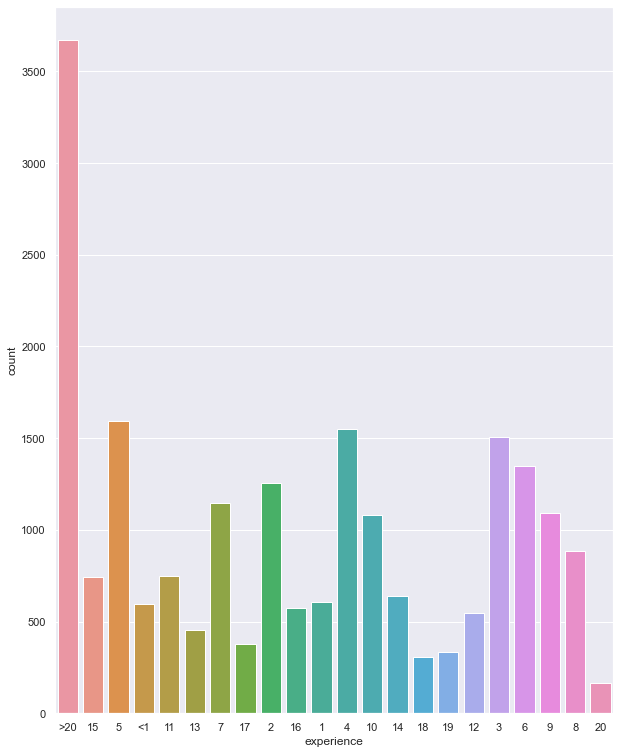

In [39]:
sns.countplot(x = 'experience', data = categorical)

<AxesSubplot:xlabel='company_size', ylabel='count'>

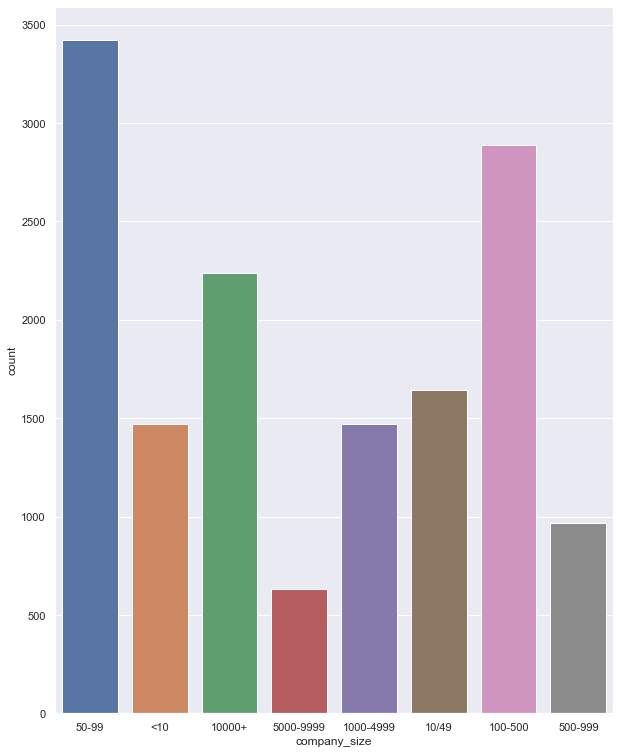

In [40]:
sns.countplot(x = 'company_size', data = categorical)

<AxesSubplot:xlabel='company_type', ylabel='count'>

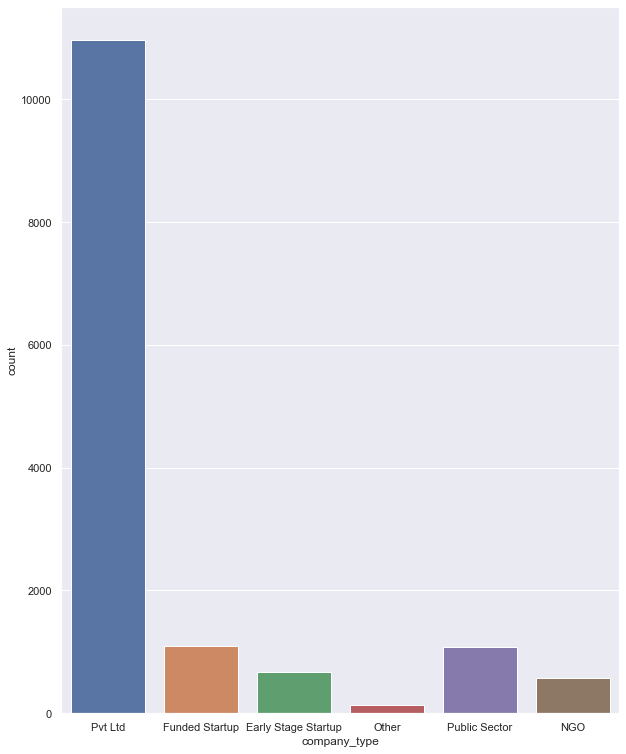

In [41]:
sns.countplot(x = 'company_type', data = categorical)

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

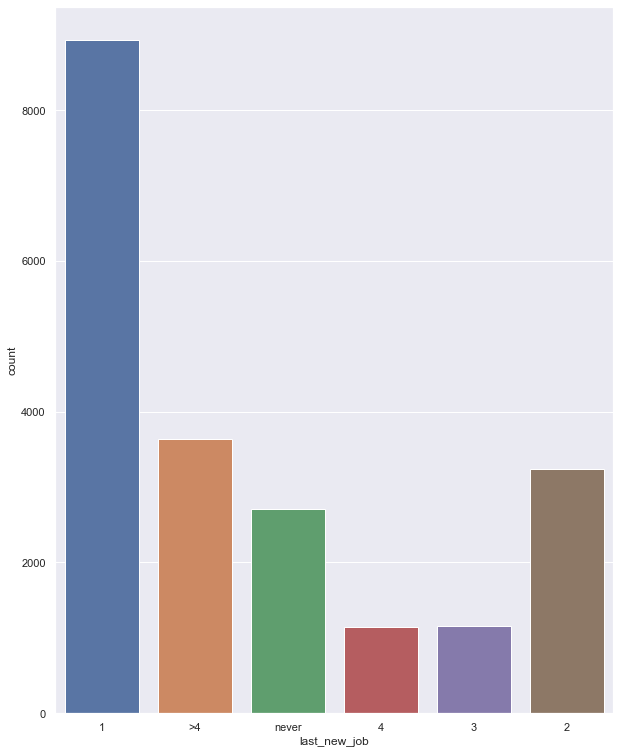

In [42]:
sns.countplot(x = 'last_new_job', data = categorical)

<AxesSubplot:xlabel='state', ylabel='count'>

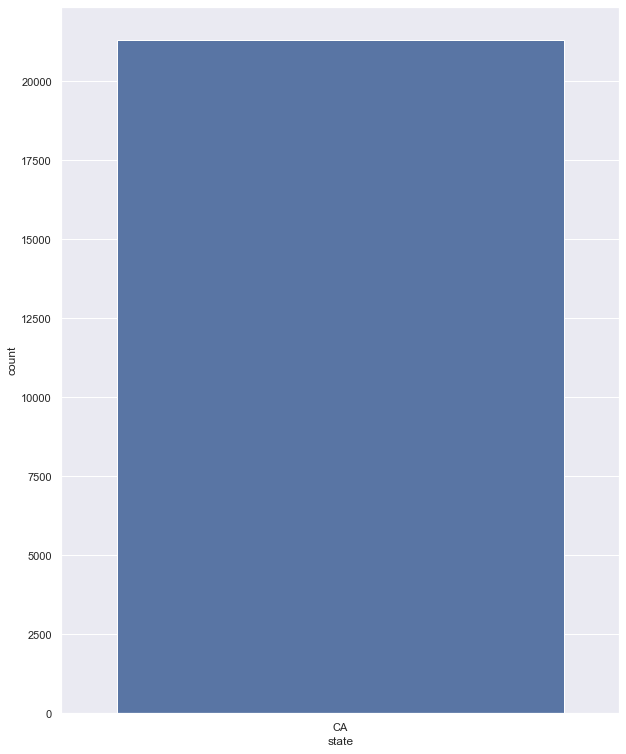

In [43]:
sns.countplot(x = 'state', data = categorical)

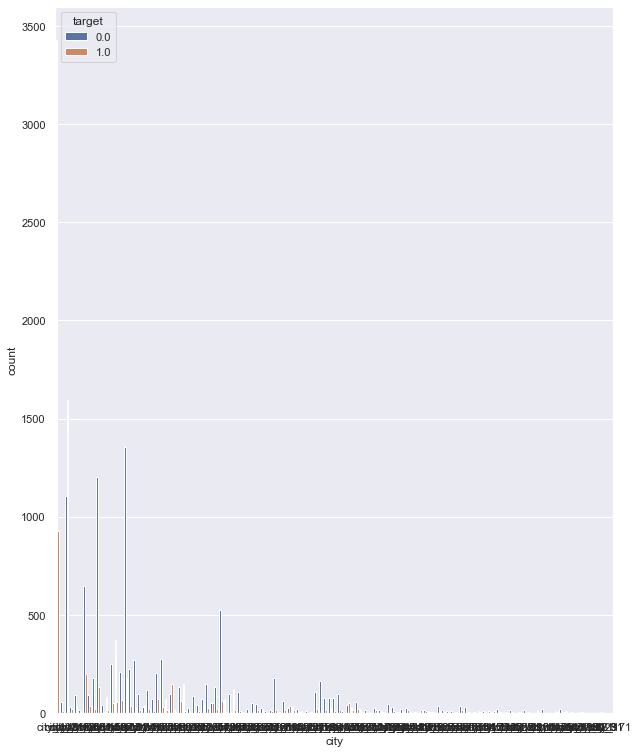

In [44]:
#Use seaborn countplot for the categorical feature against the values of the target
sns.countplot(x = 'city', hue = df['target'], data = categorical)
sns.set(rc={'figure.figsize':(10, 130)})

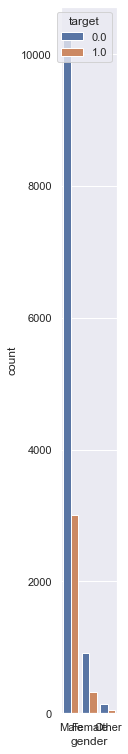

In [21]:
sns.countplot(x = 'gender', hue = df['target'], data = categorical)
sns.set(rc={'figure.figsize':(10, 13)})

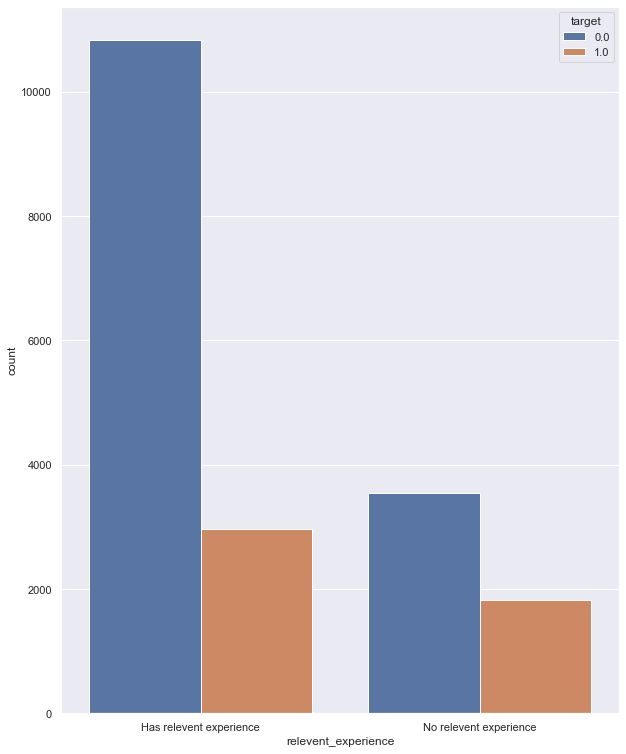

In [46]:
sns.countplot(x = 'relevent_experience', hue = df['target'], data = categorical)
sns.set(rc={'figure.figsize':(10, 13)})

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

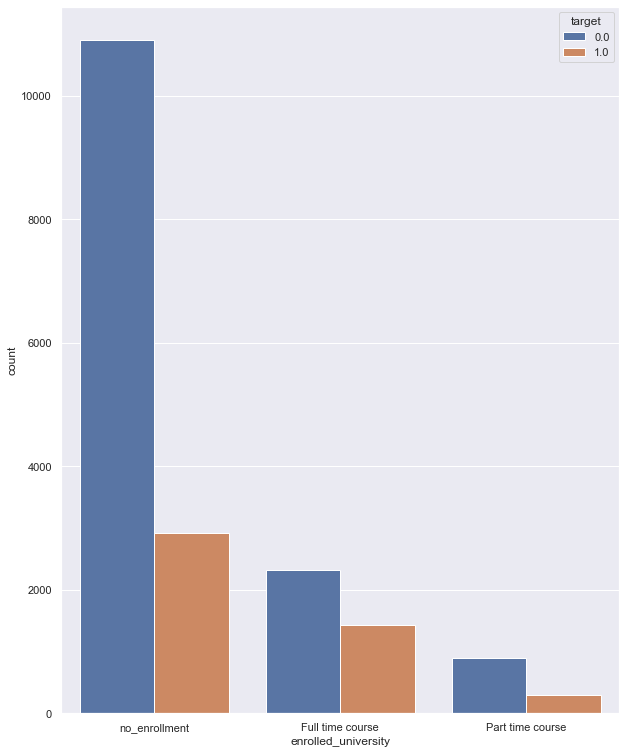

In [47]:
sns.countplot(x = 'enrolled_university', hue = df['target'], data = categorical)

<AxesSubplot:xlabel='education_level', ylabel='count'>

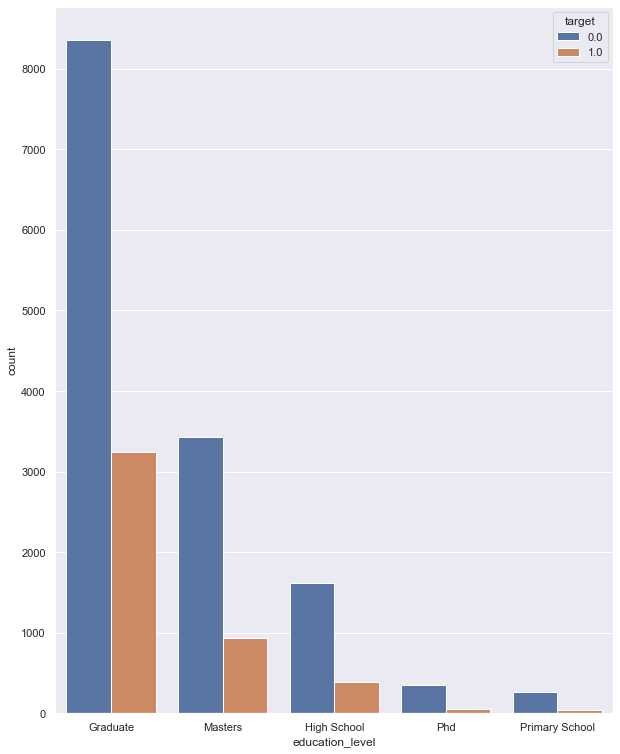

In [48]:
sns.countplot(x = 'education_level', hue = df['target'], data = categorical)

<AxesSubplot:xlabel='major_discipline', ylabel='count'>

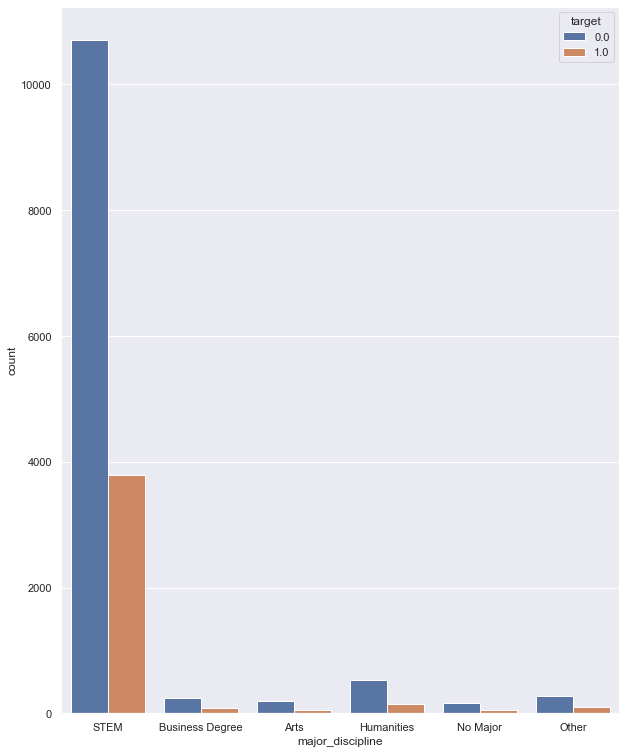

In [49]:
sns.countplot(x = 'major_discipline', hue = df['target'], data = categorical)

<AxesSubplot:xlabel='experience', ylabel='count'>

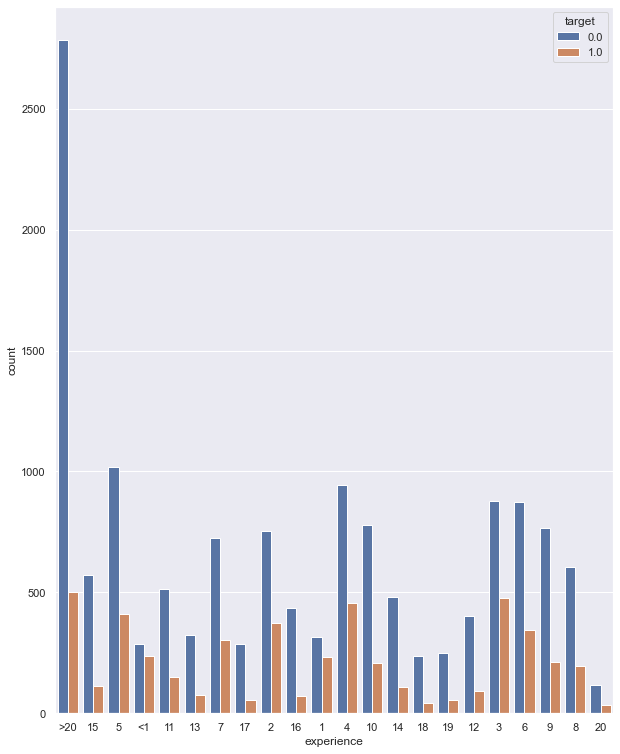

In [50]:
sns.countplot(x = 'experience', hue = df['target'], data = categorical)

<AxesSubplot:xlabel='company_size', ylabel='count'>

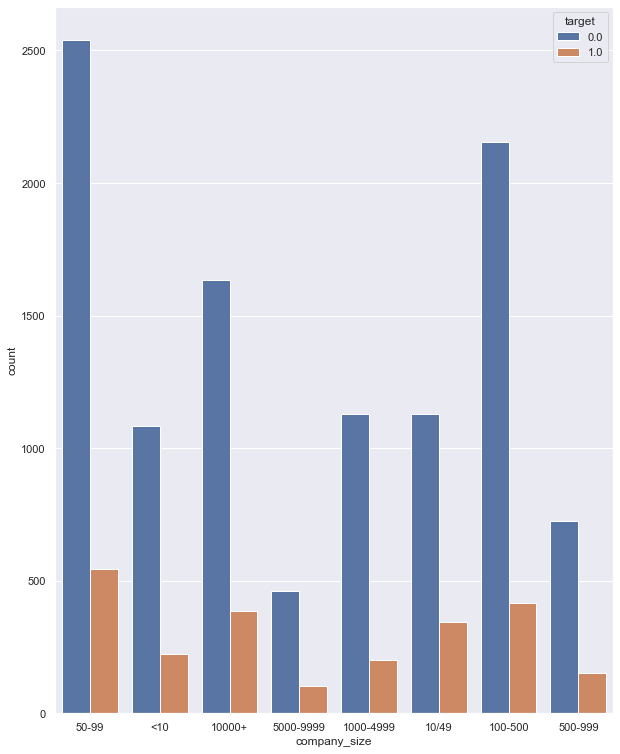

In [51]:
sns.countplot(x = 'company_size', hue = df['target'], data = categorical)

<AxesSubplot:xlabel='company_type', ylabel='count'>

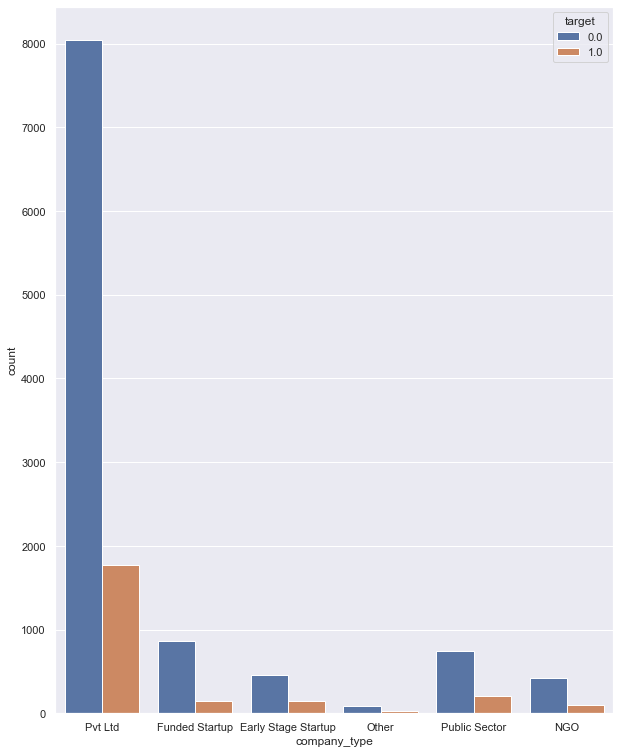

In [52]:
sns.countplot(x = 'company_type', hue = df['target'], data = categorical)

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

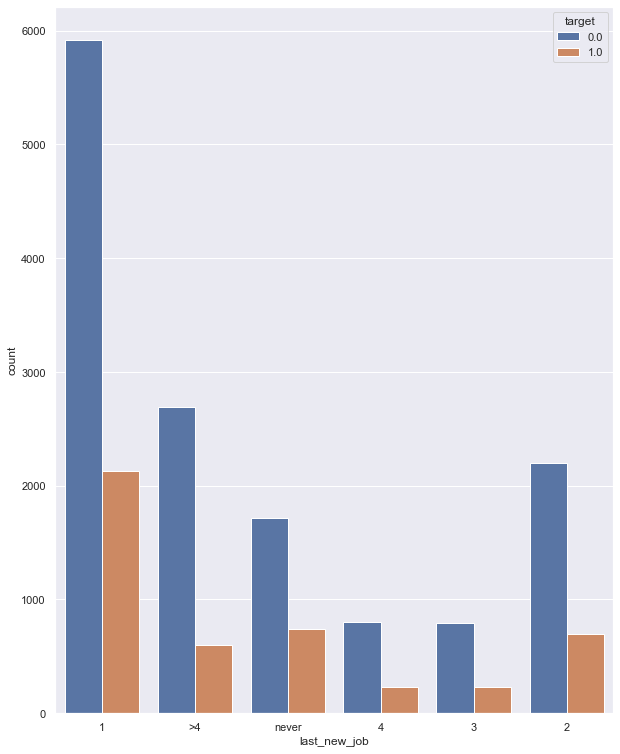

In [53]:
sns.countplot(x = 'last_new_job', hue = df['target'], data = categorical)

<AxesSubplot:xlabel='state', ylabel='count'>

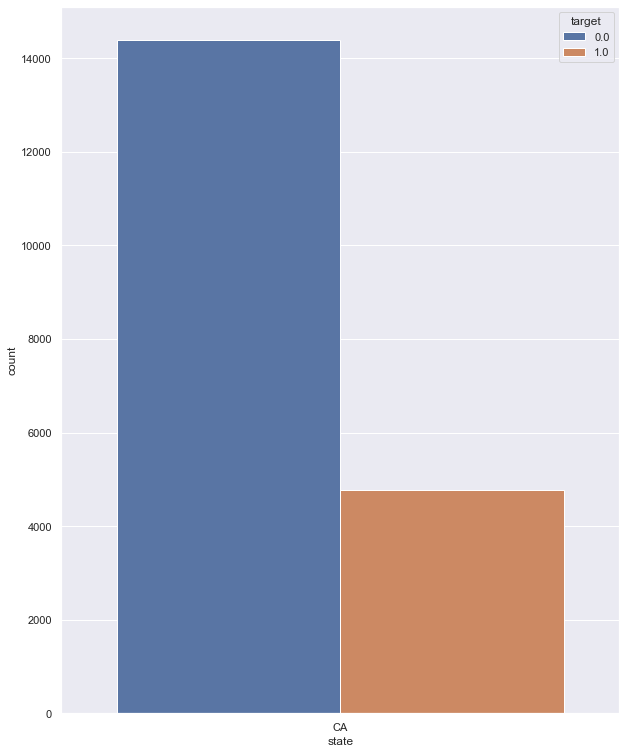

In [54]:
sns.countplot(x = 'state', hue = df['target'], data = categorical)

In [55]:
#Interpret any interesting information and any information that might help you to make any decision on combining, removing, or adding features based on that, or any resampling maybe needed.
#Since everyone in the data is from California I don't believe we need to keep that column at all as it doesn't contribute to any learning about the data or its correlation to the target value.
#It also looks like STEM graduates not enrolled in a university make up for most of the people who wish to stay with the company, which could be useful for creating a predictive model
#City 103 has the most people willing to stay for the company, since every other city has a miniscule amount of people, I would change the data to a binary input of "living in city 103" and "not living in city 103"

Index(['Unnamed: 0', 'rec_num', 'enrollee_id', 'city_development_index',
       'training_hours', 'target', 'city_development_matrics'],
      dtype='object')


(array([2129., 2129., 2128., 2129., 2128., 2129., 2129., 2128., 2129.,
        2129.]),
 array([1.00000e+00, 2.12960e+03, 4.25820e+03, 6.38680e+03, 8.51540e+03,
        1.06440e+04, 1.27726e+04, 1.49012e+04, 1.70298e+04, 1.91584e+04,
        2.12870e+04]),
 <BarContainer object of 10 artists>)

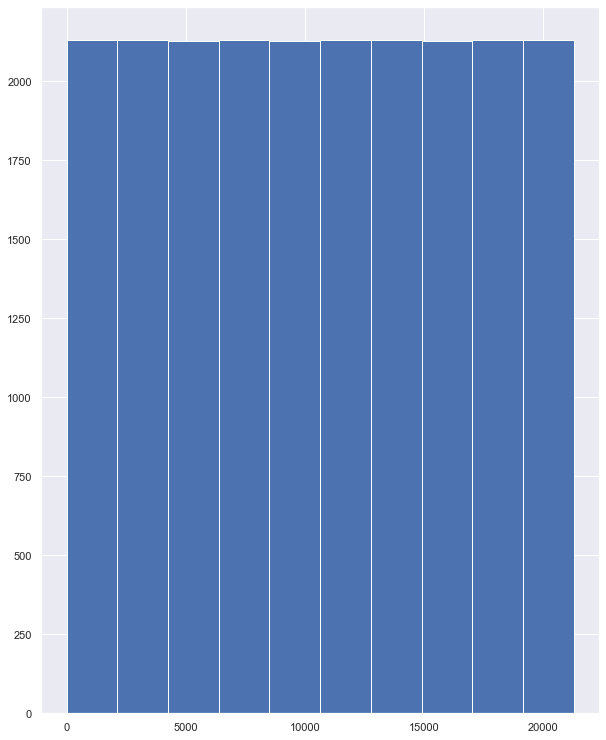

In [56]:
#For each numerical features, perform the following:
#Plot their distributions using histogram
print(numerical.columns)
plt.hist(df['rec_num'])

(array([2013., 2123., 2087., 2130., 2118., 2167., 2144., 2165., 2135.,
        2205.]),
 array([1.00000e+00, 3.33890e+03, 6.67680e+03, 1.00147e+04, 1.33526e+04,
        1.66905e+04, 2.00284e+04, 2.33663e+04, 2.67042e+04, 3.00421e+04,
        3.33800e+04]),
 <BarContainer object of 10 artists>)

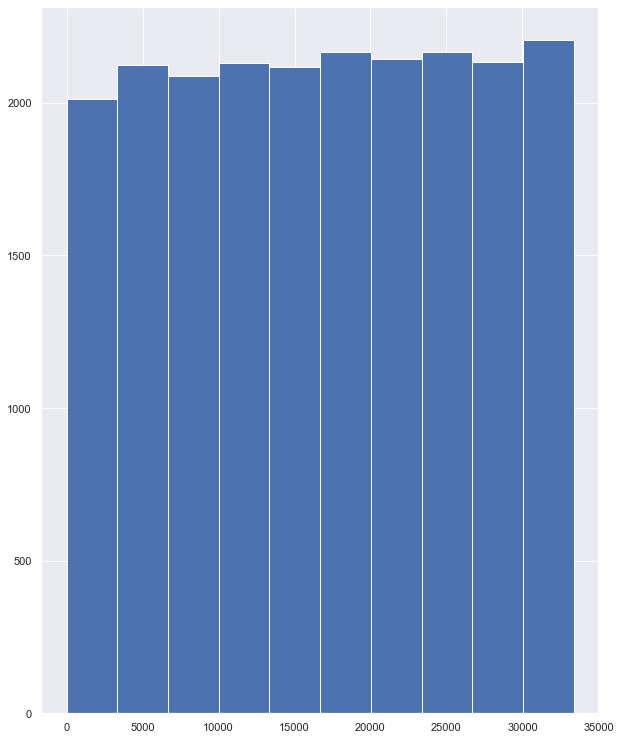

In [57]:
plt.hist(df['enrollee_id'])

<Figure size 720x720 with 0 Axes>

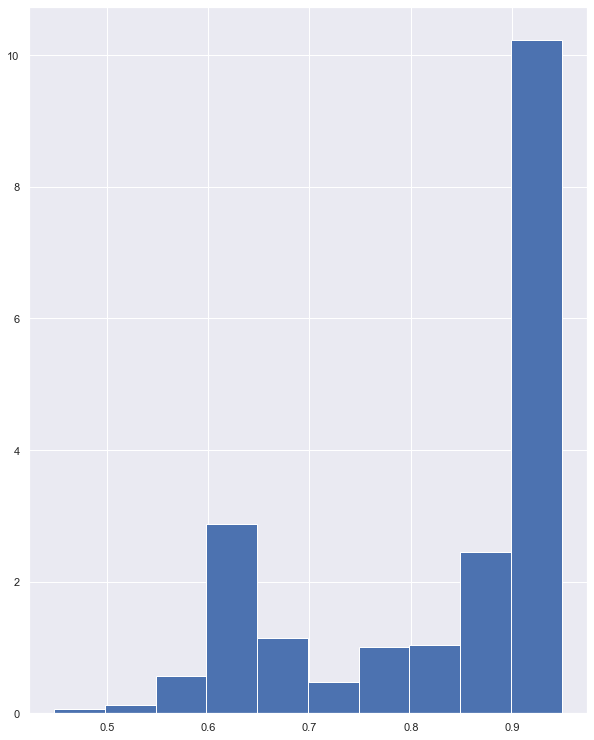

<Figure size 720x720 with 0 Axes>

In [58]:
plt.hist(df['city_development_index'], density = True)
plt.figure(figsize = (10, 10))

(array([0.01131796, 0.00806743, 0.0045154 , 0.00243579, 0.00163929,
        0.00062402, 0.0004852 , 0.00025802, 0.00021595, 0.00029168]),
 array([  1. ,  34.5,  68. , 101.5, 135. , 168.5, 202. , 235.5, 269. ,
        302.5, 336. ]),
 <BarContainer object of 10 artists>)

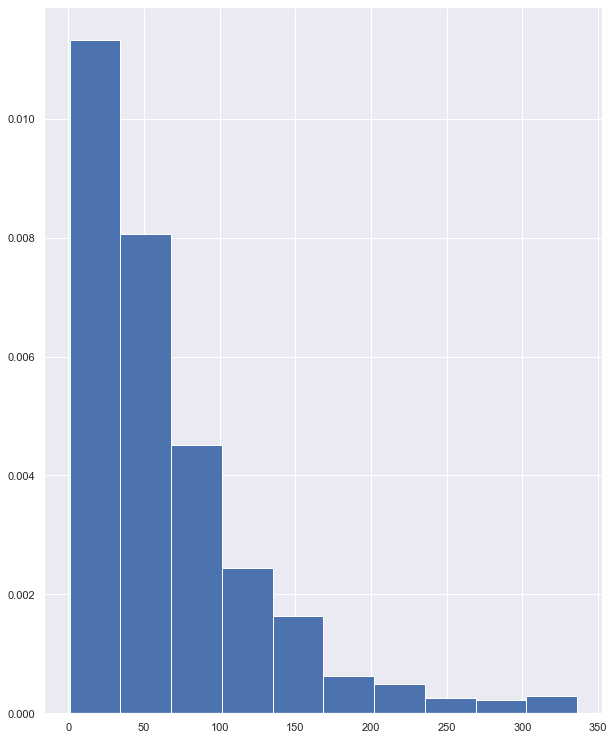

In [59]:
plt.hist(df['training_hours'], density = True)

(array([7.50652469, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 2.49347531]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

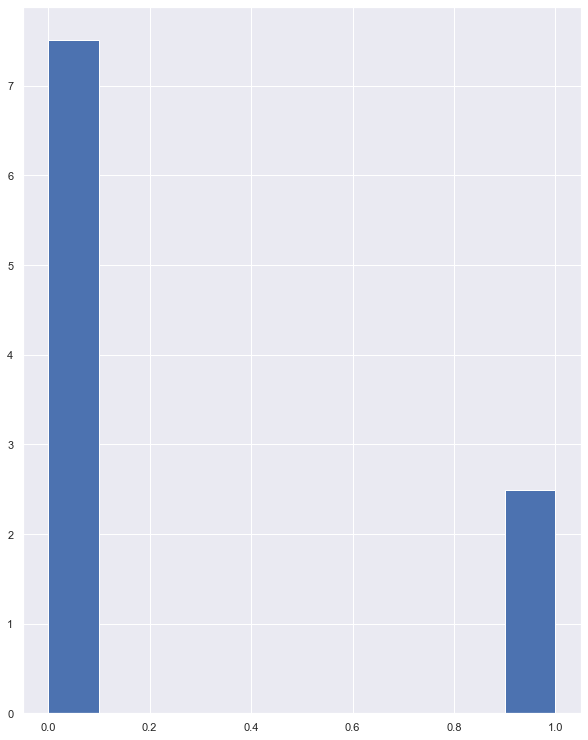

In [60]:
plt.hist(df['target'], density = True)

(array([0.09551058, 0.30369102]),
 array([4.48 , 6.985, 9.49 ]),
 <BarContainer object of 2 artists>)

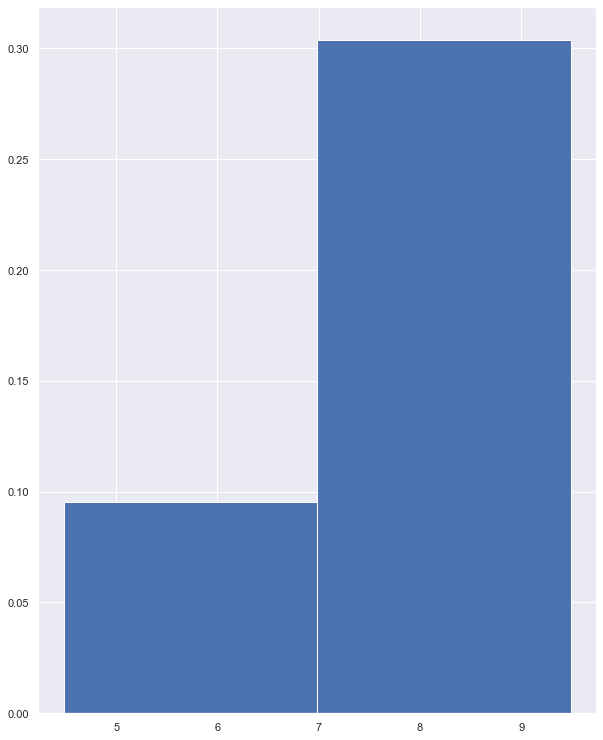

In [61]:
plt.hist(df['city_development_matrics'], density = True, bins = 2)

/Users/gabby/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rec_num', ylabel='Density'>

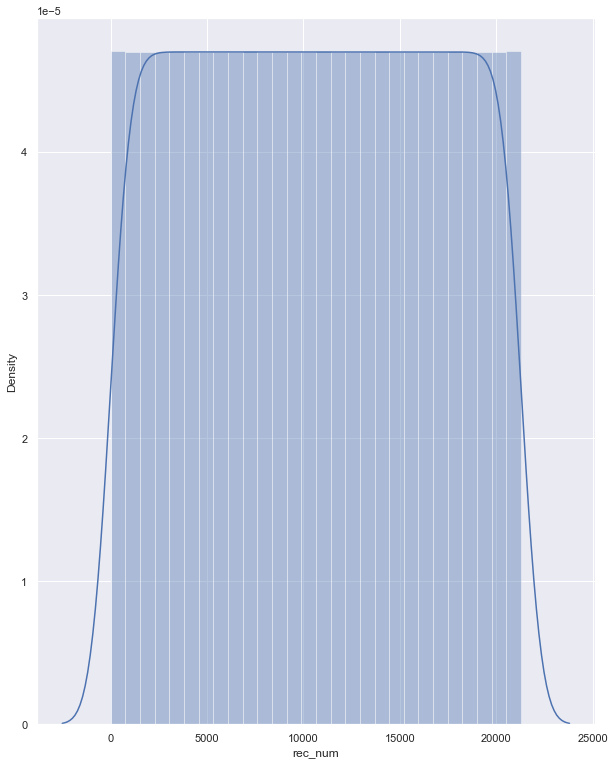

In [62]:
#Plot the distribution using seaborn distplot
sns.distplot(df['rec_num'])

/Users/gabby/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='enrollee_id', ylabel='Density'>

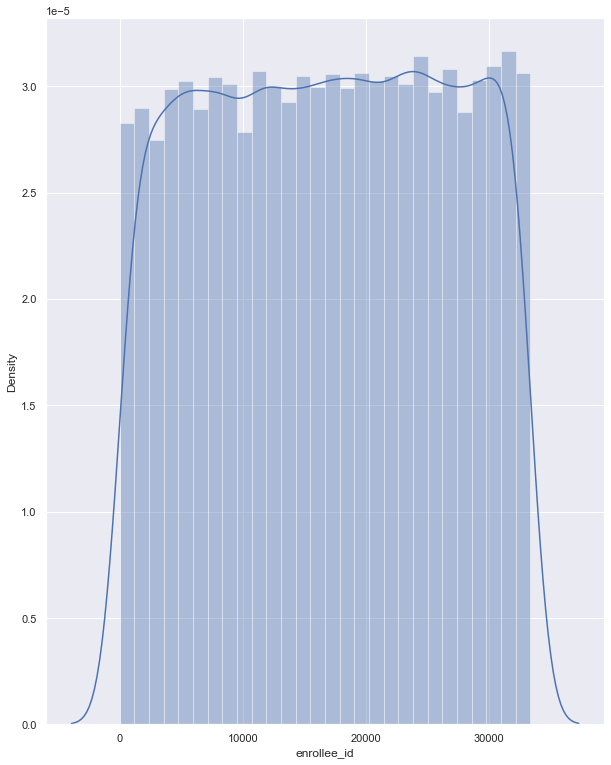

In [63]:
sns.distplot(df['enrollee_id'])

/Users/gabby/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='city_development_index', ylabel='Density'>

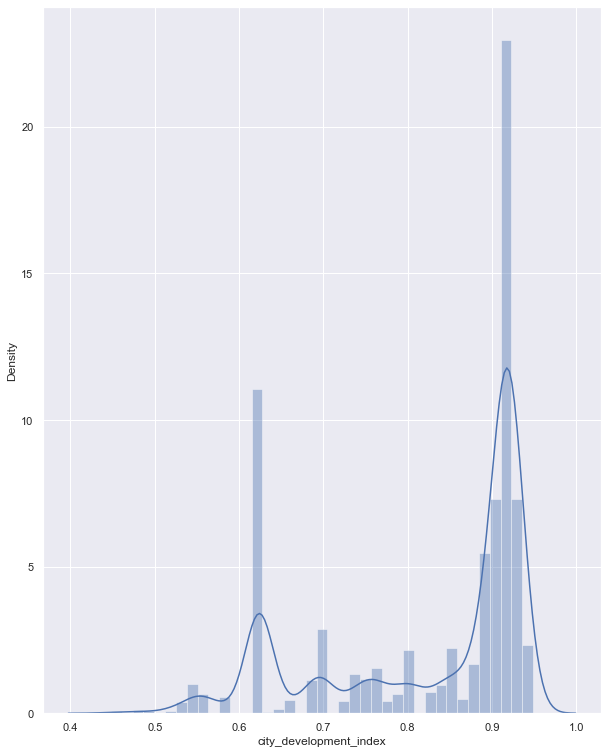

In [64]:
sns.distplot(df['city_development_index'])

/Users/gabby/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='training_hours', ylabel='Density'>

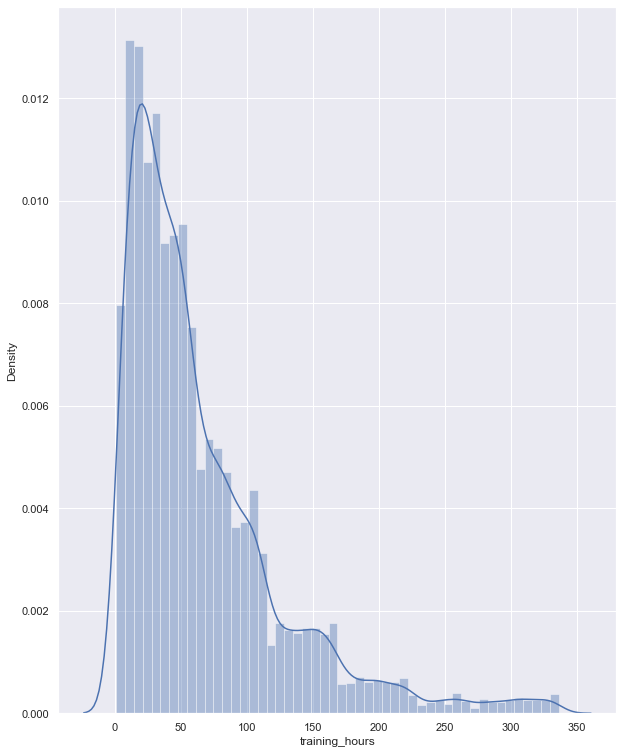

In [65]:
sns.distplot(df['training_hours'])

/Users/gabby/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

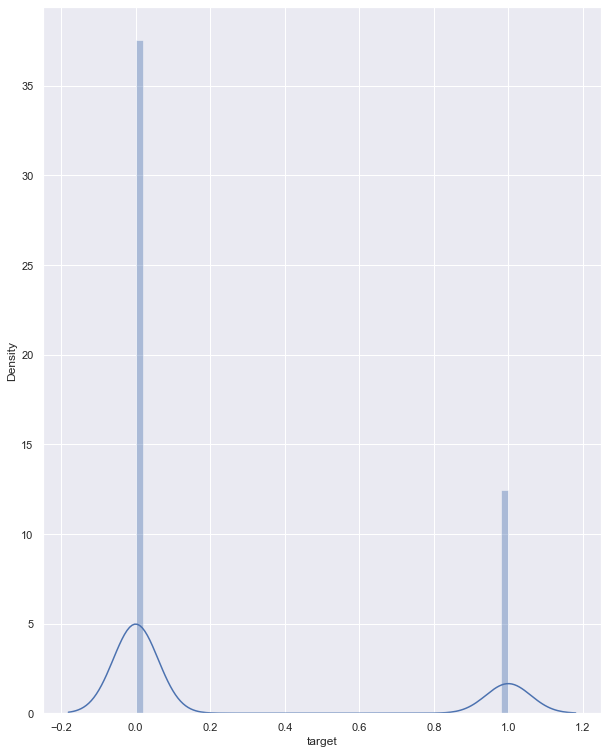

In [66]:
sns.distplot(df['target'])

/Users/gabby/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='city_development_matrics', ylabel='Density'>

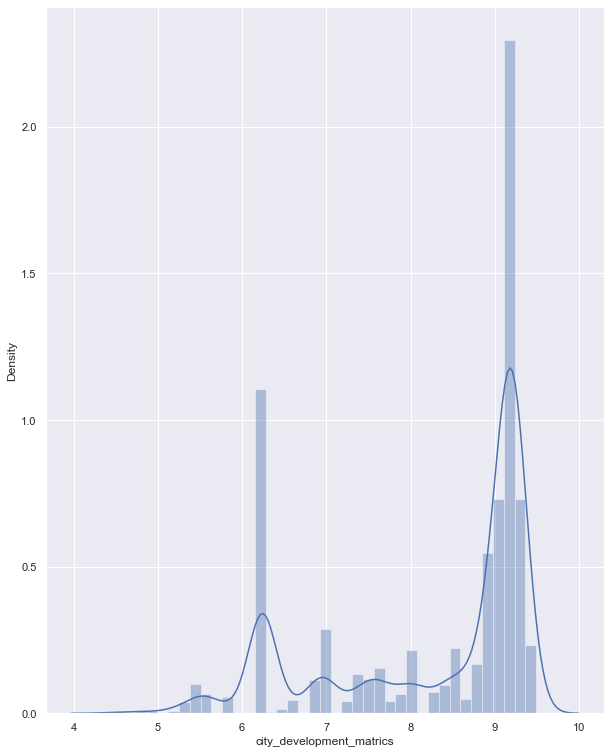

In [67]:
sns.distplot(df['city_development_matrics'])

In [68]:
#Interpret any interesting information
#These plots don't work well with things like IDs because there is one for each person, but it's good for making observations with values like 'training_hours' where you can observe that the majority of people have between 0 and around 70 hours of training under their belt, and there are some with as many as 300 training hours

<AxesSubplot:>

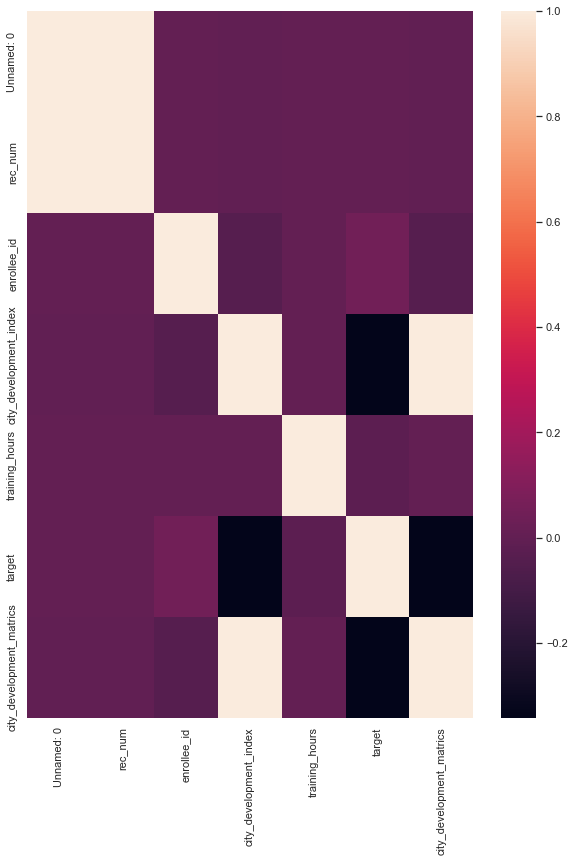

In [69]:
#For the numerical attributes, use heatmap to show the correlation
correlation = numerical.corr()
sns.heatmap(correlation)

In [70]:
#If you find any interesting short list of columns, create another heatmap with them and show the correlations inside the heaptmap as well
#Nothing interesting I hadn't already explained from the above heatmap

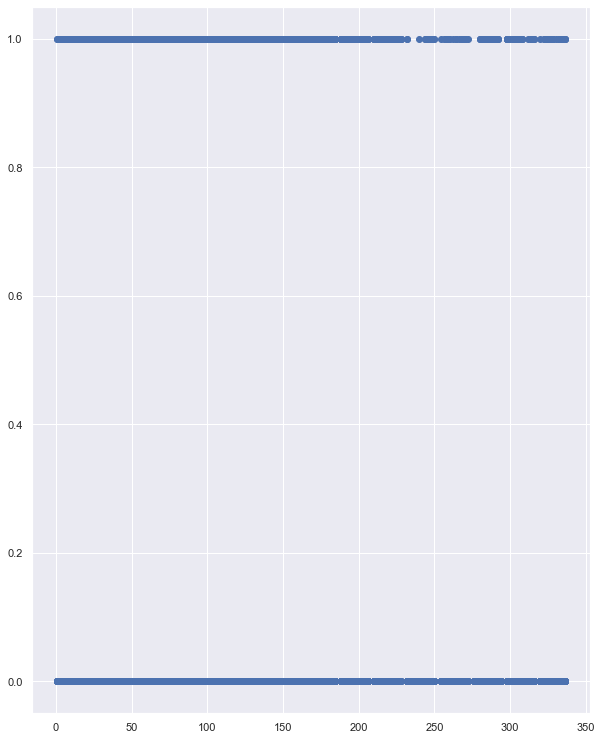

In [71]:
#Show scatter plots between columns to show the relationships with the target
plt.scatter(data = df, x = 'training_hours', y = 'target')

In [72]:
#As you can see, a scatterplot in these situations wouldn't be very useful for analysis as the values of target are either 1 or 0

In [73]:
#Interpret and explain any finding and next course of action from there
#Since the city_development_index and the city_development_matrix have no correlation to the target, there's no real reason to use it in a predictive model. I'd remove them both

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd25240df40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd25241f6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd25240dbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd25241fdc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd25242c190>],
 'means': []}

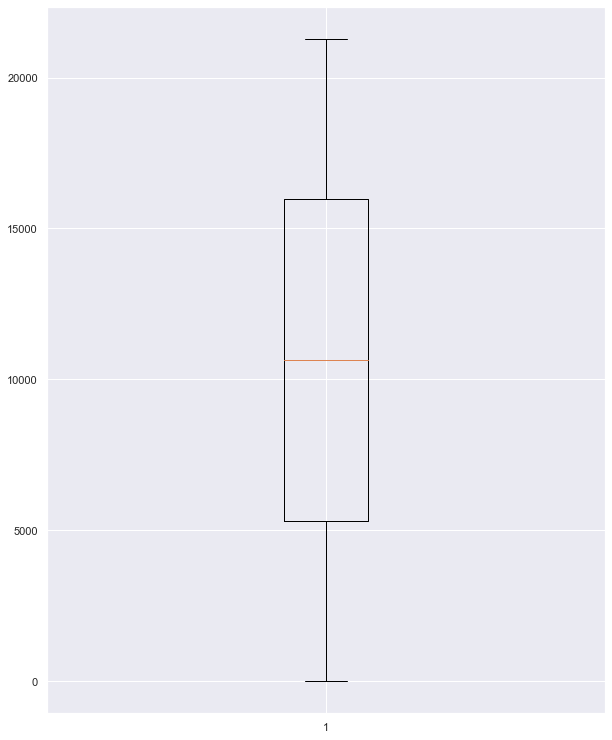

In [74]:
#Use boxplot or any other strategies to find outliers
plt.boxplot(data = df, x = 'rec_num')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd269b27dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd269b9afd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd26bf8d250>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd26a0c26a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd26994a070>],
 'means': []}

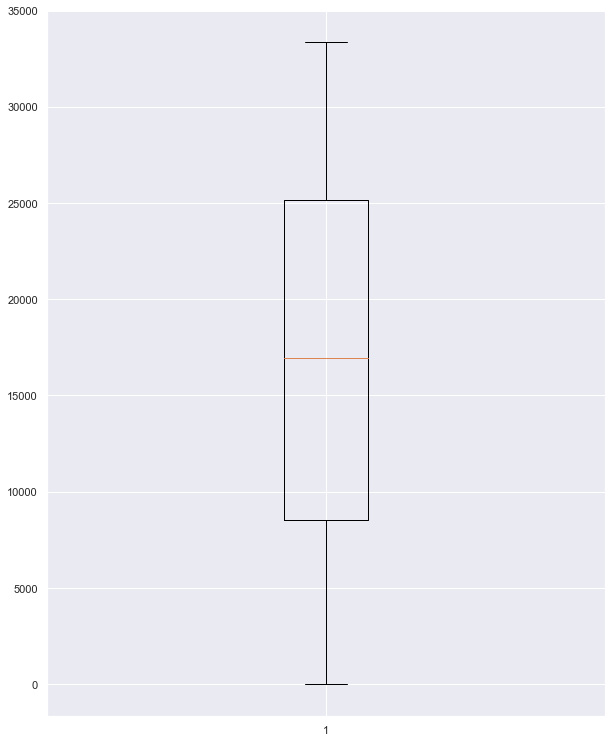

In [75]:
plt.boxplot(data = df, x = 'enrollee_id')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd25293d2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd25293da00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd252933f10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd252949160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd2529494f0>],
 'means': []}

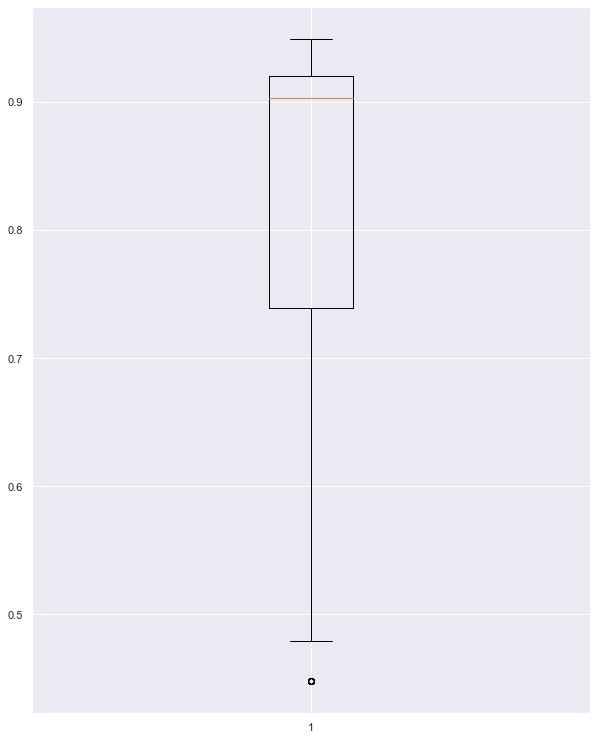

In [76]:
plt.boxplot(data = df, x = 'city_development_index')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd253495580>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd253495ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd2534951f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd2534a0400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd2534a0790>],
 'means': []}

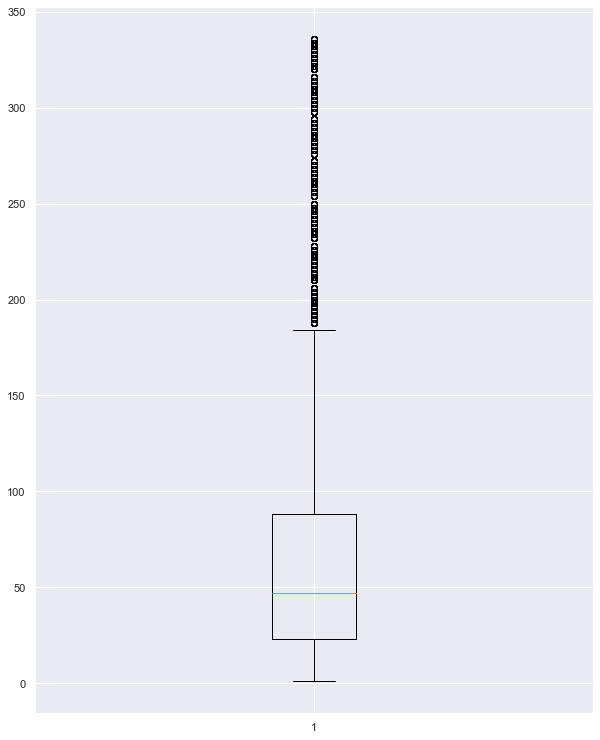

In [77]:
plt.boxplot(data = df, x = 'training_hours')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd2536a58e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd2536b3040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd2536a5550>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd2536b3760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd2536b3af0>],
 'means': []}

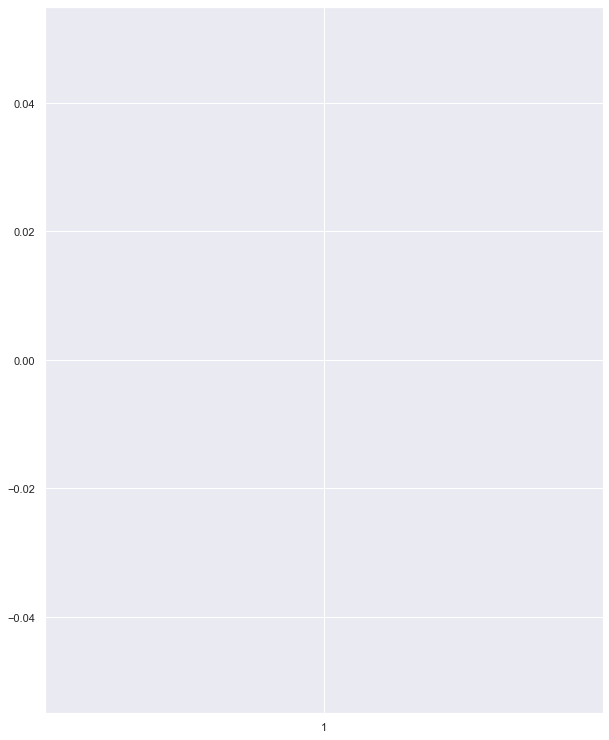

In [78]:
plt.boxplot(data = df, x = 'target')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd253a78b20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd253a86280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd253a78790>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd253a869a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd253a86d30>],
 'means': []}

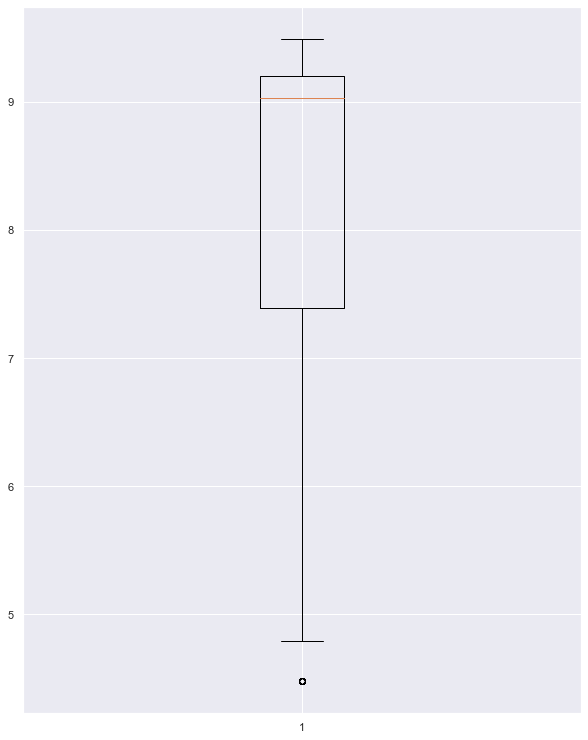

In [79]:
plt.boxplot(data = df, x = 'city_development_matrics')

In [80]:
#Lots of outliars in the 'training_hours' column, only 1 in the 'city_development_matrics' column, and 1 in the 'city_development_index'

In [81]:
#What are the different values of experience, can you categorize them in to 0, 1, and 2?
#The years of experience in this data set are values that range from less than one year of experience to more than 20 years.
#It woouldn't be too difficult to batch them into groups of 3, like 0 = years ranging from <1 to 7, 1 = years from 8 to 14, and 2 = years from 15 to 20+

In [82]:
#Finally after all the above EDA, summarize your finding, next course of action such as we may need to transform distribution because of right skew etc, need to remove a particular columns for any reasons, remove records for any reasons, need to rebalance data and what are the rebalancing options (if needed), and any other finding
#After the above EDA, values like rec_num, enrollee_id, and state are all columns I'd remove from the data as they the first two are unique for each person, thus no correlation can be found from that. Also, the state column consists of only those from california, so it's not useful for predicting or analysis at all.
#I would also consider not using any data that is missing a target value as it wouldn't be very useful in predicting they they'd stay with the company or not.
#It appears that men with relevant experience, are not currently enrolled in a university, are university graduates from the STEM field with more than 20 years of experience are only a few categories that make up the majority of those trained that wish to stay with the company. I believe the data provided would be sufficient for creating and training a predictive model, so long as the columns specified above are removed, as the model created might have a bias against anyone in a state other than california.